## Topic Modeling with Sklearn

영화 리뷰 데이터를 이용하여 topic modeling을 학습

### Topic Modeling이란?

참조: https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/06/01/LDA/

토픽모델링은 텍스트 형태로 되어 있는 다수의 문서들로부터 공통적으로 내재되어 있는 주제들을 추출하기 위한 방법론이다. <br>
토픽모델링의 기본적인 가정은, 저자들이 문서를 작성할 때 먼저 특정한 주제들을 정하고 나서 그러한 주제들로부터 문장을 구성한다는 것이다. 따라서 문서를 구성하는 단어들은 그 주제들로부터 파생되어진 것으로 볼 수 있으며, 토픽모델링은 문서와 단어들에 대해 통계적인 추론을 수행하여 본래의 주제들을 찾아내는 방법이라고 할 수 있다.  <br>
이러한 작업을 하기 위해서는 먼저 자연어로 기술되어 있는 문서들에 대해 형태소 분석을 함으로써 문장들을 개별 단어로 분리해야 한다. 
 <br>
토픽모델링의 가장 대표적인 알고리즘은 LDA(Latent Dirichlet Allocation)로 알려져 있다.  <br>
LDA는 Blei et al. (2003)에 의해 제안된 알고리즘으로, 앞서 설명한 바와 같이, 확률기법을 기반으로 하여 문서의 토픽 분포를 추론한다.  <br>
LDA에서 토픽은 주제를 의미하는 용어로 사용되며, 각 문서들이 특정한 주제에 속할 확률분포와 주제로부터 특정 단어들이 파생되어 나올 확률분포가 주어졌을 때, 이 두 확률분포를 조합하여 각 문서들에 들어가는 단어들의 확률분포를 계산해낸다.  <br>
아래 그림에서 θ는 문서들이 각 주제들에 속할 확률분포를 나타내며 디리클레분포의 매개변수인 α에 의해 결정된다.  <br>
그림에서 N은 특정 문서에 속한 단어의 집합이며, M은 전체 문서의 집합을 나타낸다. z는 문서 내의 단어들이 주제들에 속할 확률분포를 나타내며, 이는 θ에 의한 다항분포로 선택된다.  <br>
β는 각 주제가 특정 단어를 생성할 확률을 나타내는 확률분포이며, 결국 z와 β에 의해 실제 문서들의 단어분포인 w가 결정된다.  <br>
이 모형에서 w만이 실제로 문서들을 통해 주어진 분포이고 나머지는 모두 잠재변수이다.  <br>
LDA 알고리즘에서는 주어진 문서와 토픽들의 사전확률 분포인 α와 토픽 내에서 단어의 사전확률분포인 β의 파라미터 값을 활용해 반복적인 시뮬레이션을 통해 z와 θ를 추정한다. 

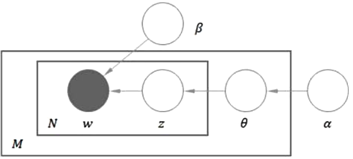

![image.png](topic.png)

인스티즈에서 추출한 아이돌 그룹별 게시글 제목을 불러온다.

In [2]:
import csv
text = []
y = []

with open('아이돌.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row and len(row[0]) > 10: #review 길이가 10자 이상인 경우만
#        if row: #그 줄에 내용이 있는 경우에만
            text.append(row[0]) #영화 리뷰를 text 리스트에 추가
            y.append(row[1]) #영화이름을 text 리스트에 추가

In [3]:
print('게시글 제목 수:', len(text))
print('아이돌 그룹:', set(y))

게시글 제목 수: 1854
아이돌 그룹: {'izone', 'twice', 'BTS', 'exo'}


In [5]:
text[:10]  #텍스트 정제문제 해결 못함

['<U+0001F525><U+0001F525><U+0001F525><U+0001F525><U+0001F525> 집중 <U+0001F525><U+0001F525><U+0001F525><U+0001F525><U+0001F525>',
 '<U+0001F525><U+0001F525><U+0001F525>최애돌 집중<U+0001F525><U+0001F525><U+0001F525>',
 '<U+0001F5E3>미디어에 보여지는 모습과 실제 자신 사이의 균형을 맞추는게 어렵지 않나요 <U+0001F42F>',
 '다들   이거 어떻게 읽어  ',
 '분 남아따 <U+0001F525><U+0001F525><U+0001F525><U+0001F525><U+0001F525><U+0001F525><U+0001F525>',
 '<U+0001F525><U+0001F525><U+0001F525><U+0001F525><U+0001F525> 최애돌 끝나고 다른거 해줘<U+0001F525><U+0001F525><U+0001F525><U+0001F525><U+0001F525> ㅠㅠ',
 'ㅇㄸㅃㄸㅇㄸㅃㄸㅇㄸㅃㄸ',
 '오래전에 ㅍㅍ작가였는데 반응이 너무 없어서 포타 트위터 둘 다 펑했는데  ',
 '롤링스톤 이부분 개웃겨ㅋㅋㅋㅋ',
 '울애들 상쭐내줍시다         ']

#### 한글 처리를 위해서는 konlpy가 필요

topic modeling은 count vector를 사용하므로 sklearn의 CountVectorizer를 사용

In [6]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)

In [7]:
review_cv.shape

(1854, 1000)

#### sklearn의 LatentDirichletAllocation을 이용하여 topic modeling 수행
다양한 argument를 적절히 이용하는 것이 중요

In [8]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [9]:
print('topic-word distribution dimension:', lda.components_.shape)
print('document-topic distribution dimenstion', review_topics.shape)

topic-word distribution dimension: (10, 1000)
document-topic distribution dimenstion (1854, 10)


#### topic을 보기 쉽게 출력하는 함수를 작성

In [10]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [11]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 오늘, 거, 브이, 앱, 눈, 컴백, 나연, 월, 언제, 뮤비
Topic #1: 백현, 우리, 투표, 윤기, 인증, 래미, 최애, 입덕, 돌, 꼭
Topic #2: 진짜, 이, 둘리, 개, 트와이스, 준, 일본, 말, 방, 온라인
Topic #3: 애, 독방, 노래, 수, 내, 분, 오프, 그, 중, 너
Topic #4: 종인, 타팬, 이번, 왜, 때, 하루, 난, 곡, 공지, 유진
Topic #5: 사진, 일, 영상, 울, 티르, 스밍, 보은, 움짤, 제발, 원스
Topic #6: 나, 이제, 콘서트, 징, 뒤, 버블, 줄, 떡밥, 무슨, 이틀
Topic #7: 생일, 아이즈, 축하, 위, 해, 유리, 또, 날, 보고, 은비
Topic #8: 뭐, 탄소, 지금, 좀, 안, 하트, 명, 프메, 민주, 시작
Topic #9: 사람, 앨범, 혹시, 겨울, 스포, 채원, 여기, 솔로, 친구, 더



#### 한 자로 구성된 명사들은 의미파악이 어려우므로 삭제할 필요가 있음
두 자 이상만 반환하는 함수를 작성

In [12]:
twitter_tag.nouns(text[1])

['최애', '돌', '집중']

In [13]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [14]:
tokenizer(text[1])

['최애', '집중']

In [15]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 1000) #너무 자주 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

In [16]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 50, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 유리, 솔로, 남준, 로고, 왓이즈럽, 참여, 카메라, 매일, 가능성, 마마
Topic #1: 유진, 건가, 다음, 어차피, 가용, 큥르, 촬영, 최근, 기념, 원츄
Topic #2: 탄소, 방탄, 손민수, 정말, 궁예, 숨스, 여러분, 아이돌, 콘도, 혹쉬
Topic #3: 백현, 뭔가, 광고, 왜케, 계속, 글코, 만날, 메이크업, 중국어, 노빠꾸
Topic #4: 진짜, 종인, 사랑, 인터뷰, 고생, 아이콘, 전정국, 댕댕, 그린, 나나
Topic #5: 한번, 웃기, 토너, 안녕, 히토미, 티켓, 응원봉, 빅히트, 총총, 박스
Topic #6: 버블, 버스, 미나, 어디, 정리, 계정, 제일, 문의, 자신, 구경
Topic #7: 민주, 숙청, 애기, 타임, 모습, 프리징, 육성, 사이, 틸틸, 스토리
Topic #8: 아이즈, 추천, 준면, 기절, 유니버스, 데뷔, 유닛, 재발, 커뮤니티, 태명
Topic #9: 태형, 처음, 둥이, 몇개, 링크, 랜덤, 알제, 살짝, 입장, 알라딘
Topic #10: 프메, 은비, 사쿠라, 활동, 정규, 혜원, 내년, 홍보, 거기, 하장
Topic #11: 앨범, 단체, 공구, 벌써, 이름, 기차, 버전, 입술, 다이너마이트, 완쓰들
Topic #12: 제발, 온콘, 다시, 바보, 너희, 똥손, 사실, 완료, 썸넬, 안뇽
Topic #13: 둘리, 오프, 김종인, 내일, 관심, 종특, 의외, 충전, 주의, 원인
Topic #14: 여기, 최애, 원영, 김남준, 자리, 아침, 부탁, 빠띠, 와우, 한지
Topic #15: 하나, 라이브, 갑자기, 일단, 디싱, 기부, 비티, 팝업, 최초, 시즌
Topic #16: 트와이스, 티르, 온라인, 구해, 배경화면, 단발, 쿠라, 교환, 거지, 팡파레
Topic #17: 삐삐, 완전, 가요, 눈물, 미리, 공트, 왔지녁, 시리즈, 바바, 화요일
Topic #18: 오늘, 진심, 중간, 음중, 건너, 변경, 저녁, 친삭, 불가, 가야
Topic #19: 독방, 

50개의 topic들을 대상으로 clustering을 수행해서 topic들이 잘 묶을 수 있는지 확인

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [1 1 1 1 3 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 4 1 1 1]


T-SNE를 이용하여 각 topic들 간의 관계를 시각화

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([   1.6999741,   26.528866 ,  -58.93403  ,  -77.12929  ,
       -122.158134 ,   18.41475  ,  -52.62474  ,   33.709976 ,
         90.46262  ,  -12.441018 ,   52.85433  ,   48.545856 ,
        -25.740494 ,   94.272675 ,   61.403503 ,  -17.211168 ,
          1.2656676,    9.304597 ,  -99.623245 ,  115.61471  ,
         18.56973  ,   -1.1597338,  -61.557735 ,   10.805117 ,
         31.226965 ,   71.11579  , -107.38415  ,   -3.1555269,
         57.06543  ,   55.120316 ,   50.462902 ,  -44.006695 ,
         -5.8885098,    6.44591  ,   45.228966 ,  -81.934654 ,
         17.360794 ,  -14.6056   ,  -38.292614 ,   27.64206  ,
         87.606575 ,  -91.84288  ,  -64.12889  ,  -26.020853 ,
        -53.7765   ,  -27.157038 ,  -29.466843 ,  102.29008  ,
        -29.218107 ,  -36.326794 ], dtype=float32)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

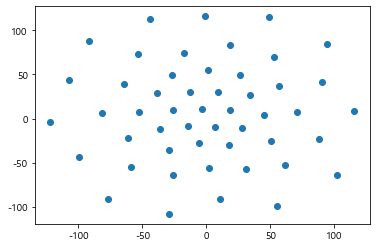

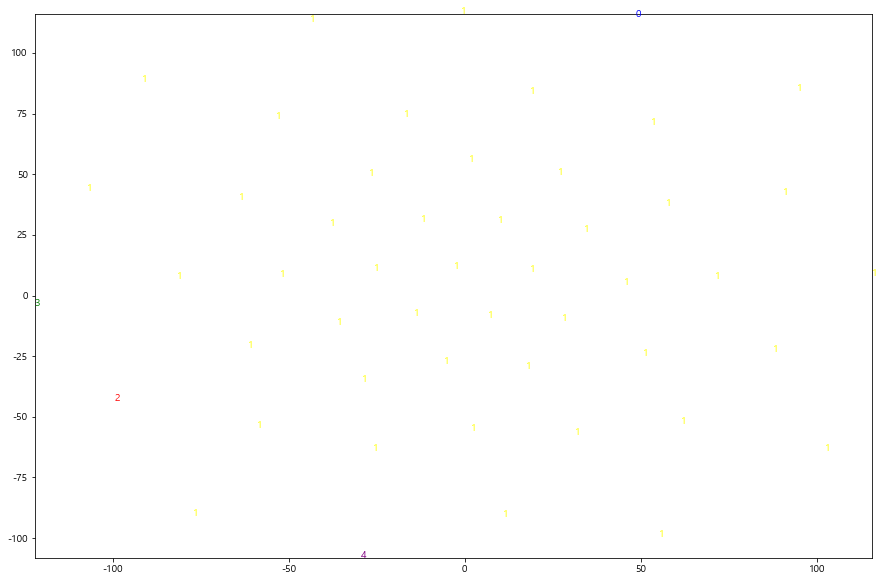

In [20]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음

#### 최적의 결과를 찾기 위한 방법
적절한 topic의 수는 perplexity 값을 이용해 찾음.<br>
낮을 수록 좋은 모형이나, 사람의 판단과 일치하지 않을 수 있음<br>
http://qpleple.com/perplexity-to-evaluate-topic-models/ <br>
그 외에 alpha, beta는 앞서 설명한 바와 같이 beta=0.1로 고정하고 alpha를 50/토픽수 근처에서 찾아나감<br>
반복횟수는 5,000번 정도면 수렴

In [21]:
lda.perplexity(review_cv)

3056.6703089699085

In [22]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 25, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 이제, 솔로, 유리, 티저, 남준, 게임, 인스타, 댓글, 참여, 환상
Topic #1: 영상, 유진, 사진, 건가, 다음, 어차피, 민석, 가용, 큥르, 다른
Topic #2: 투표, 방탄, 어제, 탄소, 컨셉, 피에스타, 손민수, 방금, 정말, 주니
Topic #3: 백현, 노래, 겨울, 뭔가, 광고, 디싱, 관련, 왜케, 스엠, 계속
Topic #4: 종인, 진짜, 언제, 머리, 사랑, 인터뷰, 혜원, 멜론, 얼마, 분위기
Topic #5: 브이, 사람, 질문, 한번, 웃기, 토너, 안녕, 행복, 웨어, 얼마나
Topic #6: 혹시, 하트, 버블, 버스, 미나, 어디, 크게, 정리, 다현, 계정
Topic #7: 탄소, 인증, 민주, 스밍, 숙청, 무대, 애기, 타임, 모습, 진짜
Topic #8: 아이즈, 스포, 오늘, 추천, 주년, 한국, 준면, 기분, 기절, 어디껀
Topic #9: 우리, 태형, 처음, 확인, 포카, 오늘, 얼른, 어미, 둥이, 몇개
Topic #10: 프메, 시작, 뮤비, 무슨, 활동, 이틀, 정규, 일본, 방송, 홍보
Topic #11: 앨범, 사쿠라, 단체, 라이브, 공구, 벌써, 이면, 꼬꼬, 얘기, 개인
Topic #12: 팬미팅, 제발, 움짤, 마이크, 다시, 진짜, 정구, 시간, 특전, 바보
Topic #13: 둘리, 진짜, 오프, 김종인, 내일, 하자, 오빠, 그림, 격차, 관심
Topic #14: 채원, 여기, 최애, 원영, 김남준, 자리, 아가, 아침, 애옹, 감동
Topic #15: 진짜, 사진, 하나, 갑자기, 일단, 공개, 민윤기, 기부, 팝업, 비티
Topic #16: 나연, 트와이스, 티르, 온라인, 구해, 배경화면, 머글, 단발, 스타, 월요일
Topic #17: 친구, 멤버, 조유리, 삐삐, 나코, 정연, 완전, 가요, 눈물, 김민주
Topic #18: 오늘, 윤기, 래미, 떡밥, 큥콘, 미리, 음중, 중간, 체경, 부터
Topic #19: 독방, 사진, 생각, 그냥, 모음, 전시회

1999.6717882503683

In [23]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 둘리, 이제, 솔로, 티저, 시작, 생각, 미나, 남준, 마이크, 정구
Topic #1: 사진, 우리, 생일, 축하, 영상, 은비, 트와이스, 유진, 멤버, 그거
Topic #2: 투표, 래미, 떡밥, 움짤, 요즘, 방송, 라이브, 사나, 다시, 동화
Topic #3: 백현, 앨범, 노래, 겨울, 스포, 티르, 뭔가, 건가, 질문, 자리
Topic #4: 진짜, 컴백, 프메, 무슨, 진심, 머리, 원스, 사랑, 온콘, 인터뷰
Topic #5: 브이, 사람, 혹시, 채원, 여기, 오프, 이틀, 단체, 숙청, 한번
Topic #6: 지금, 하트, 유리, 친구, 콘서트, 최애, 버블, 보은, 버스, 예나
Topic #7: 타팬, 이번, 윤기, 인증, 보고, 뮤비, 팬미팅, 스밍, 공지, 무대
Topic #8: 오늘, 탄소, 아이즈, 하루, 나연, 민주, 언제, 일본, 온라인, 입덕
Topic #9: 종인, 독방, 하나, 활동, 제발, 태형, 그냥, 김남준, 처음, 아케이드



1165.4809546112103